In [1]:
#Logistic regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/titanic_train.csv', index_col= 0)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
#### exploratory data analysis

sns.countplot(data= df, x='Survived', hue= 'Sex')
plt.figure()

sns.countplot(data= df, x='Survived', hue= 'Embarked')
plt.figure()

sns.countplot(data= df, x='Survived', hue= 'Pclass')
plt.figure()

sns.histplot(data= df, x= 'Age', bins= 30)
plt.figure()

sns.countplot(data= df, x= 'SibSp')     #    'SibSp'  -   Siblings/Spouse
plt.figure()

In [8]:
#### Cleaning and preparing the data

# removes missing values
df.dropna(inplace=True)

#  represents (female|male) as (0|1)
sex = pd.get_dummies(df['Sex'])     

embark = pd.get_dummies(df['Embarked'])

# adds binary interpretations of sex and embark to dataset
df = pd.concat([df, sex, embark], axis= 1)

# 'cabin' - high count null row
# 'Name', 'Ticket' - not needed
# original 'sex', 'embarked' - replaced by bin equivalents
df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], axis= 1, inplace= True)

In [12]:
df.isnull().count()

Survived    183
Pclass      183
Age         183
SibSp       183
Parch       183
Fare        183
female      183
male        183
C           183
Q           183
S           183
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 2 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Age       183 non-null    float64
 3   SibSp     183 non-null    int64  
 4   Parch     183 non-null    int64  
 5   Fare      183 non-null    float64
 6   female    183 non-null    uint8  
 7   male      183 non-null    uint8  
 8   C         183 non-null    uint8  
 9   Q         183 non-null    uint8  
 10  S         183 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 10.9 KB


In [9]:
from sklearn.model_selection import  train_test_split

# splits 'survived' column from dataset
# randomly creates training and testing samples
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis= 1), df['Survived'], test_size = .3, random_state = 101)

In [ ]:
# 70% of data for training
x_train

In [ ]:
# 'survived' column for 70% data
y_train

In [ ]:
# test on 30% of the data
x_test

In [ ]:
# survived column of 30% data
y_test

In [ ]:
#   making and using the model

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter= 1000)     

logmodel.fit(x_train, y_train)

predict = logmodel.predict(x_test)

In [ ]:
logmodel.score(x_test, y_test)

0.6909090909090909

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54        22
           1       0.70      0.85      0.77        33

    accuracy                           0.69        55
   macro avg       0.68      0.65      0.65        55
weighted avg       0.69      0.69      0.68        55



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


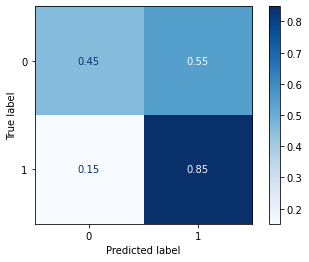

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logmodel, x_test, y_test, cmap=plt.cm.Blues, normalize='true')